In [5]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import pywt

In [6]:
samplerate, data = wavfile.read('/content/drive/MyDrive/FWT_data/guitar.wav') # reading audio

In [7]:
t = np.arange(len(data)) / float(samplerate) # getting time

In [8]:
data = data/max(data) # normalize audio data

In [9]:
cA, cD = pywt.dwt(data, 'bior6.8', 'per') # DWT

In [10]:
y = pywt.idwt(cA, cD, 'bior6.8', 'per') # IDWT

In [11]:
wavfile.write('guitarR.wav', samplerate, y) # writing y as audio

In [12]:
wavfile.write('guitarcD.wav', samplerate, cD) # writing cD as audio

In [15]:
wavfile.write('guitarcA.wav', samplerate, cA) # writing cD as audio

In [13]:
L = len(data)
y = y[0:L]
plt.figure(figsize = (30, 20))

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

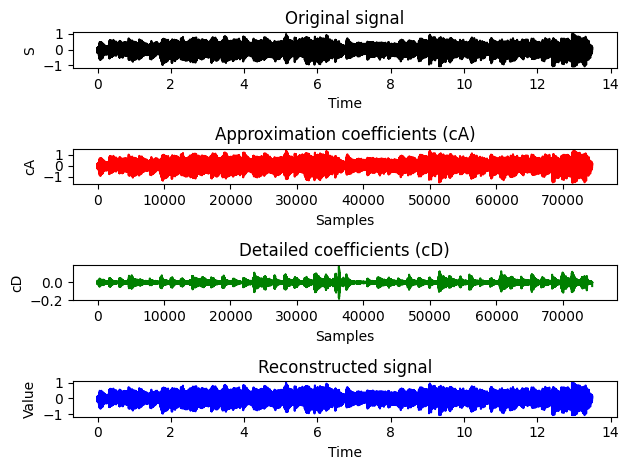

In [14]:
plt.subplot(4, 1, 1)
plt.plot(t, data, color = 'k')
plt.xlabel('Time')
plt.ylabel('S')
plt.title('Original signal')

plt.subplot(4, 1, 2)
plt.plot(cA, color = 'r')
plt.xlabel('Samples')
plt.ylabel('cA')
plt.title('Approximation coefficients (cA)')

plt.subplot(4, 1, 3)
plt.plot(cD, color = 'g')
plt.xlabel('Samples')
plt.ylabel('cD')
plt.title('Detailed coefficients (cD)')

plt.subplot(4, 1, 4)
plt.plot(t, y, color = 'b')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Reconstructed signal')

plt.subplots_adjust(hspace = 3)
plt.tight_layout()
plt.savefig('WT_Audio.png', dpi = 100)
plt.show()